In [1]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_merged <- read.csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/same_tp_cf_diff_mmd.csv")

In [11]:
df_merged

X    condition         Unnamed..0      value         perturbation_effect
1     0   zc4h2_control_24  mmd_KA neuron    0.000000000          NA         
2     1   met_control_36    mmd_KA neuron    0.000000000          NA         
3     2   tfap2a_control_72 mmd_KA neuron    0.000000000          NA         
4     3   hgfa_control_48   mmd_KA neuron    0.000000000          NA         
5     4   tfap2a_foxd3_72   mmd_KA neuron    0.000000000          NA         
6     5   noto_control_18   mmd_KA neuron    0.000000000          NA         
7     6   cdx4_cdx1a_36     mmd_KA neuron    0.000000000          NA         
8     7   epha4a_control_48 mmd_KA neuron    0.000000000          NA         
9     8   mafba_control_36  mmd_KA neuron    0.003607938  0.01731204         
10    9   tbx16_msgn1_24    mmd_KA neuron    0.000000000          NA         
11   10   noto_control_24   mmd_KA neuron    0.000000000          NA         
12   11   smo_control_18    mmd_KA neuron    0.000000000          NA         
13   12   hand2_control_24  mmd_KA neuron    0.000000000          NA         
14   13   noto_control_36   mmd_KA neuron    0.000000000          NA         
15   14   egr2b_control_36  mmd_KA neuron    0.000000000          NA         
16   15   cdx4_control_18   mmd_KA neuron    0.000000000          NA         
17   16   tfap2a_control_36 mmd_KA neuron    0.000000000          NA         
18   17   foxi1_control_72  mmd_KA neuron    0.000000000          NA         
19   18   egr2b_control_24  mmd_KA neuron    0.000000000          NA         
20   19   cdx4_control_36   mmd_KA neuron    0.000000000          NA         
21   20   zc4h2_control_36  mmd_KA neuron    0.000000000          NA         
22   21   hoxb1a_control_48 mmd_KA neuron    0.000000000          NA         
23   22   tfap2a_foxd3_36   mmd_KA neuron    0.000000000          NA         
24   23   tbx16_tbx16l_24   mmd_KA neuron    0.000000000          NA         
25   24   smo_control_36    mmd_KA neuron    0.000000000          NA         
26   25   mafba_control_18  mmd_KA neuron    0.000000000          NA         
27   26   hgfa_control_72   mmd_KA neuron    0.000000000          NA         
28   27   tbx16_control_18  mmd_KA neuron    0.000000000          NA         
29   28   mafba_control_24  mmd_KA neuron    0.000000000          NA         
30   29   tbx1_control_36   mmd_KA neuron   -0.001349745  0.01532810         
⋮    ⋮    ⋮                 ⋮               ⋮             ⋮                  
6574 6573 tbx16_msgn1_36    mmd_xanthophore  0.0009791674 0.008551899        
6575 6574 foxd3_control_72  mmd_xanthophore -0.0030951584 0.014556660        
6576 6575 wnt3a_wnt8_24     mmd_xanthophore  0.0000000000          NA        
6577 6576 egr2b_control_18  mmd_xanthophore  0.0012139222 0.012993023        
6578 6577 wnt3a_wnt8_18     mmd_xanthophore  0.0000000000          NA        
6579 6578 met_control_72    mmd_xanthophore  0.0022529699 0.017389037        
6580 6579 phox2a_control_36 mmd_xanthophore  0.0008869320 0.005641946        
6581 6580 epha4a_control_24 mmd_xanthophore  0.0087488843 0.020107759        
6582 6581 foxd3_control_36  mmd_xanthophore  0.0001323838 0.009797484        
6583 6582 tfap2a_foxd3_48   mmd_xanthophore  0.0000000000          NA        
6584 6583 hand2_control_36  mmd_xanthophore  0.0007682121 0.006589295        
6585 6584 cdx4_cdx1a_24     mmd_xanthophore -0.0028794929 0.011031517        
6586 6585 hgfa_control_36   mmd_xanthophore -0.0071355784 0.007364946        
6587 6586 tbx16_tbx16l_18   mmd_xanthophore  0.0000000000          NA        
6588 6587 tbxta_control_36  mmd_xanthophore  0.0022410946 0.016706772        
6589 6588 cdx4_control_24   mmd_xanthophore -0.0011137538 0.012924474        
6590 6589 foxd3_control_48  mmd_xanthophore  0.0016185213 0.013656240        
6591 6590 met_control_48    mmd_xanthophore  0.0032934770 0.019626632        
6592 6591 tbx1_control_24   mmd_xanthophore  0.0012434733 0.004966845        
6593 6592 epha4a_control_36

Warning message:
“Removed 2556 rows containing missing values or values outside the scale range
(`geom_point()`).”


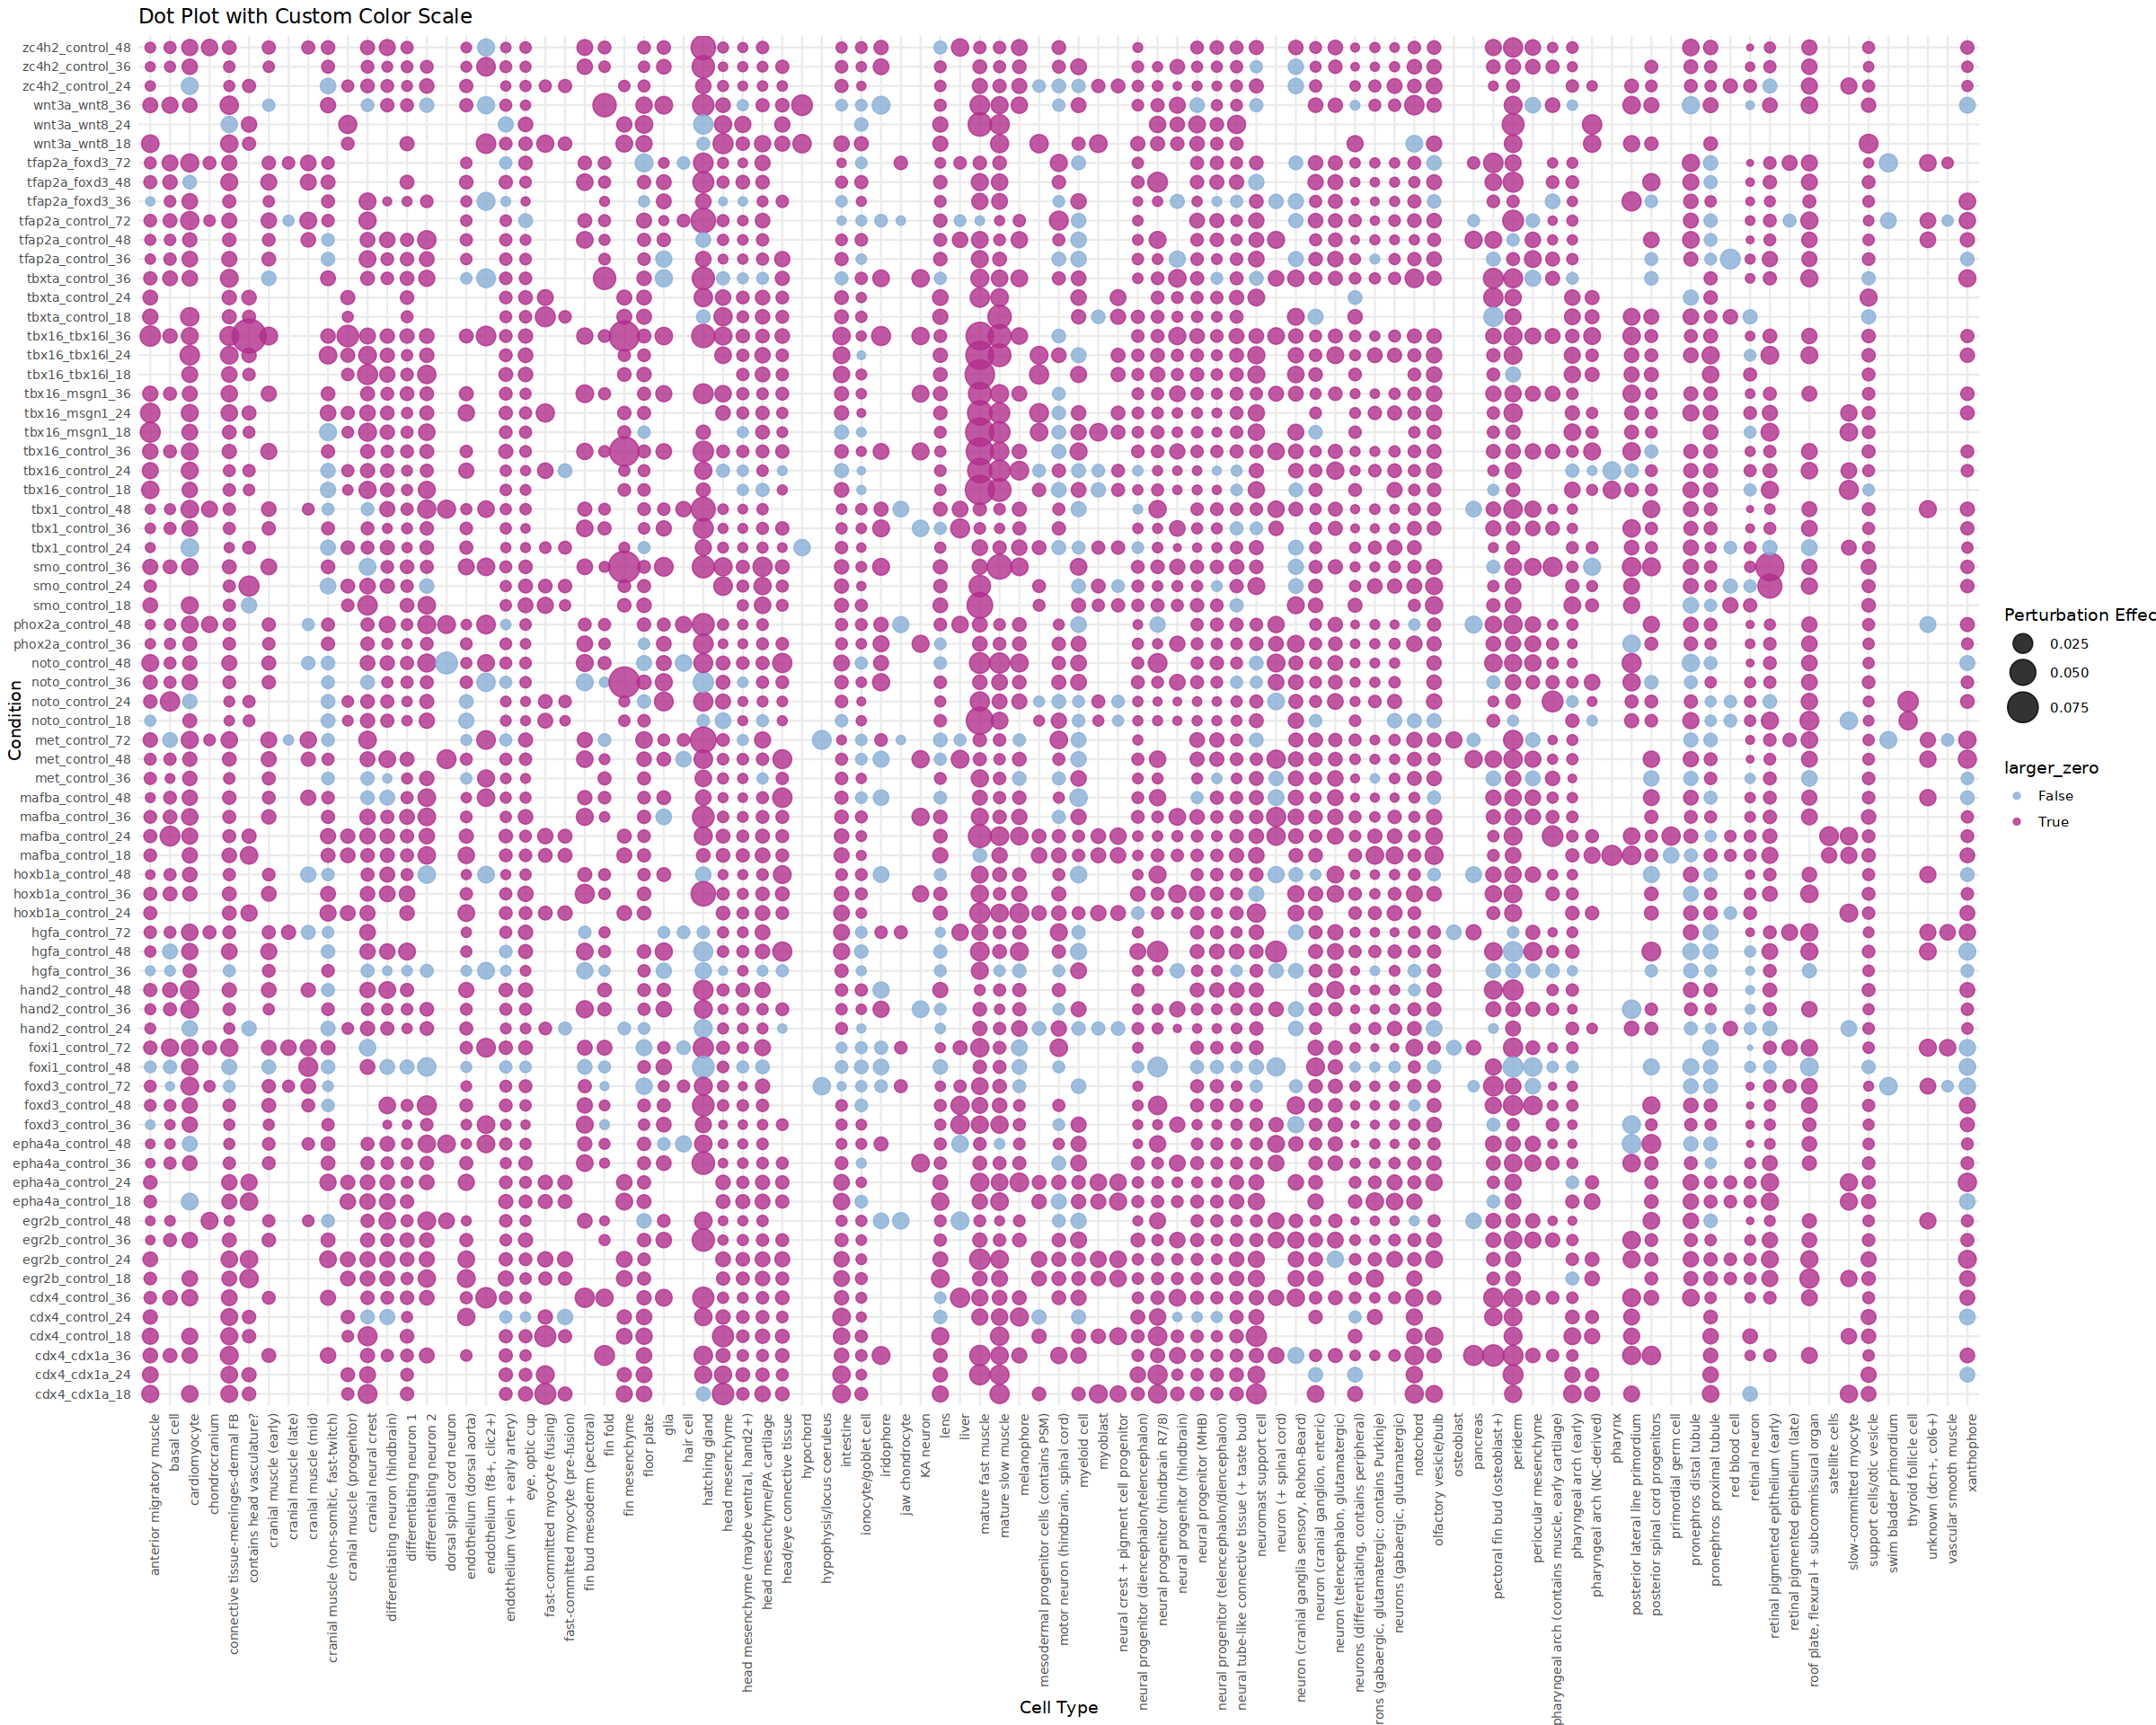

In [7]:
options(repr.plot.width = 20, repr.plot.height = 16)
custom_palette <- c("#B12F8C", "#FFFFFF", "#E1C8AC")  # Negative -> White -> Positive

color_dict = c(
    "True"= "#B12F8C",
    "False"= "#88afd7")
# Ensure the color scale is centered at 0

# Create ggplot
ggplot(df_merged, aes(
  x = cell_type,
  y = condition,
  size = perturbation_effect,
  color = larger_zero
)) +
  geom_point(alpha = 0.8) +
  scale_color_manual(
    values = color_dict,
  ) +
  scale_size(range = c(1, 10), name = "Perturbation Effect") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    legend.position = "right"
  ) +
  labs(
    title = "Dot Plot with Custom Color Scale",
    x = "Cell Type",
    y = "Condition"
  )

Warning message:
“Removed 2556 rows containing missing values or values outside the scale range
(`geom_point()`).”


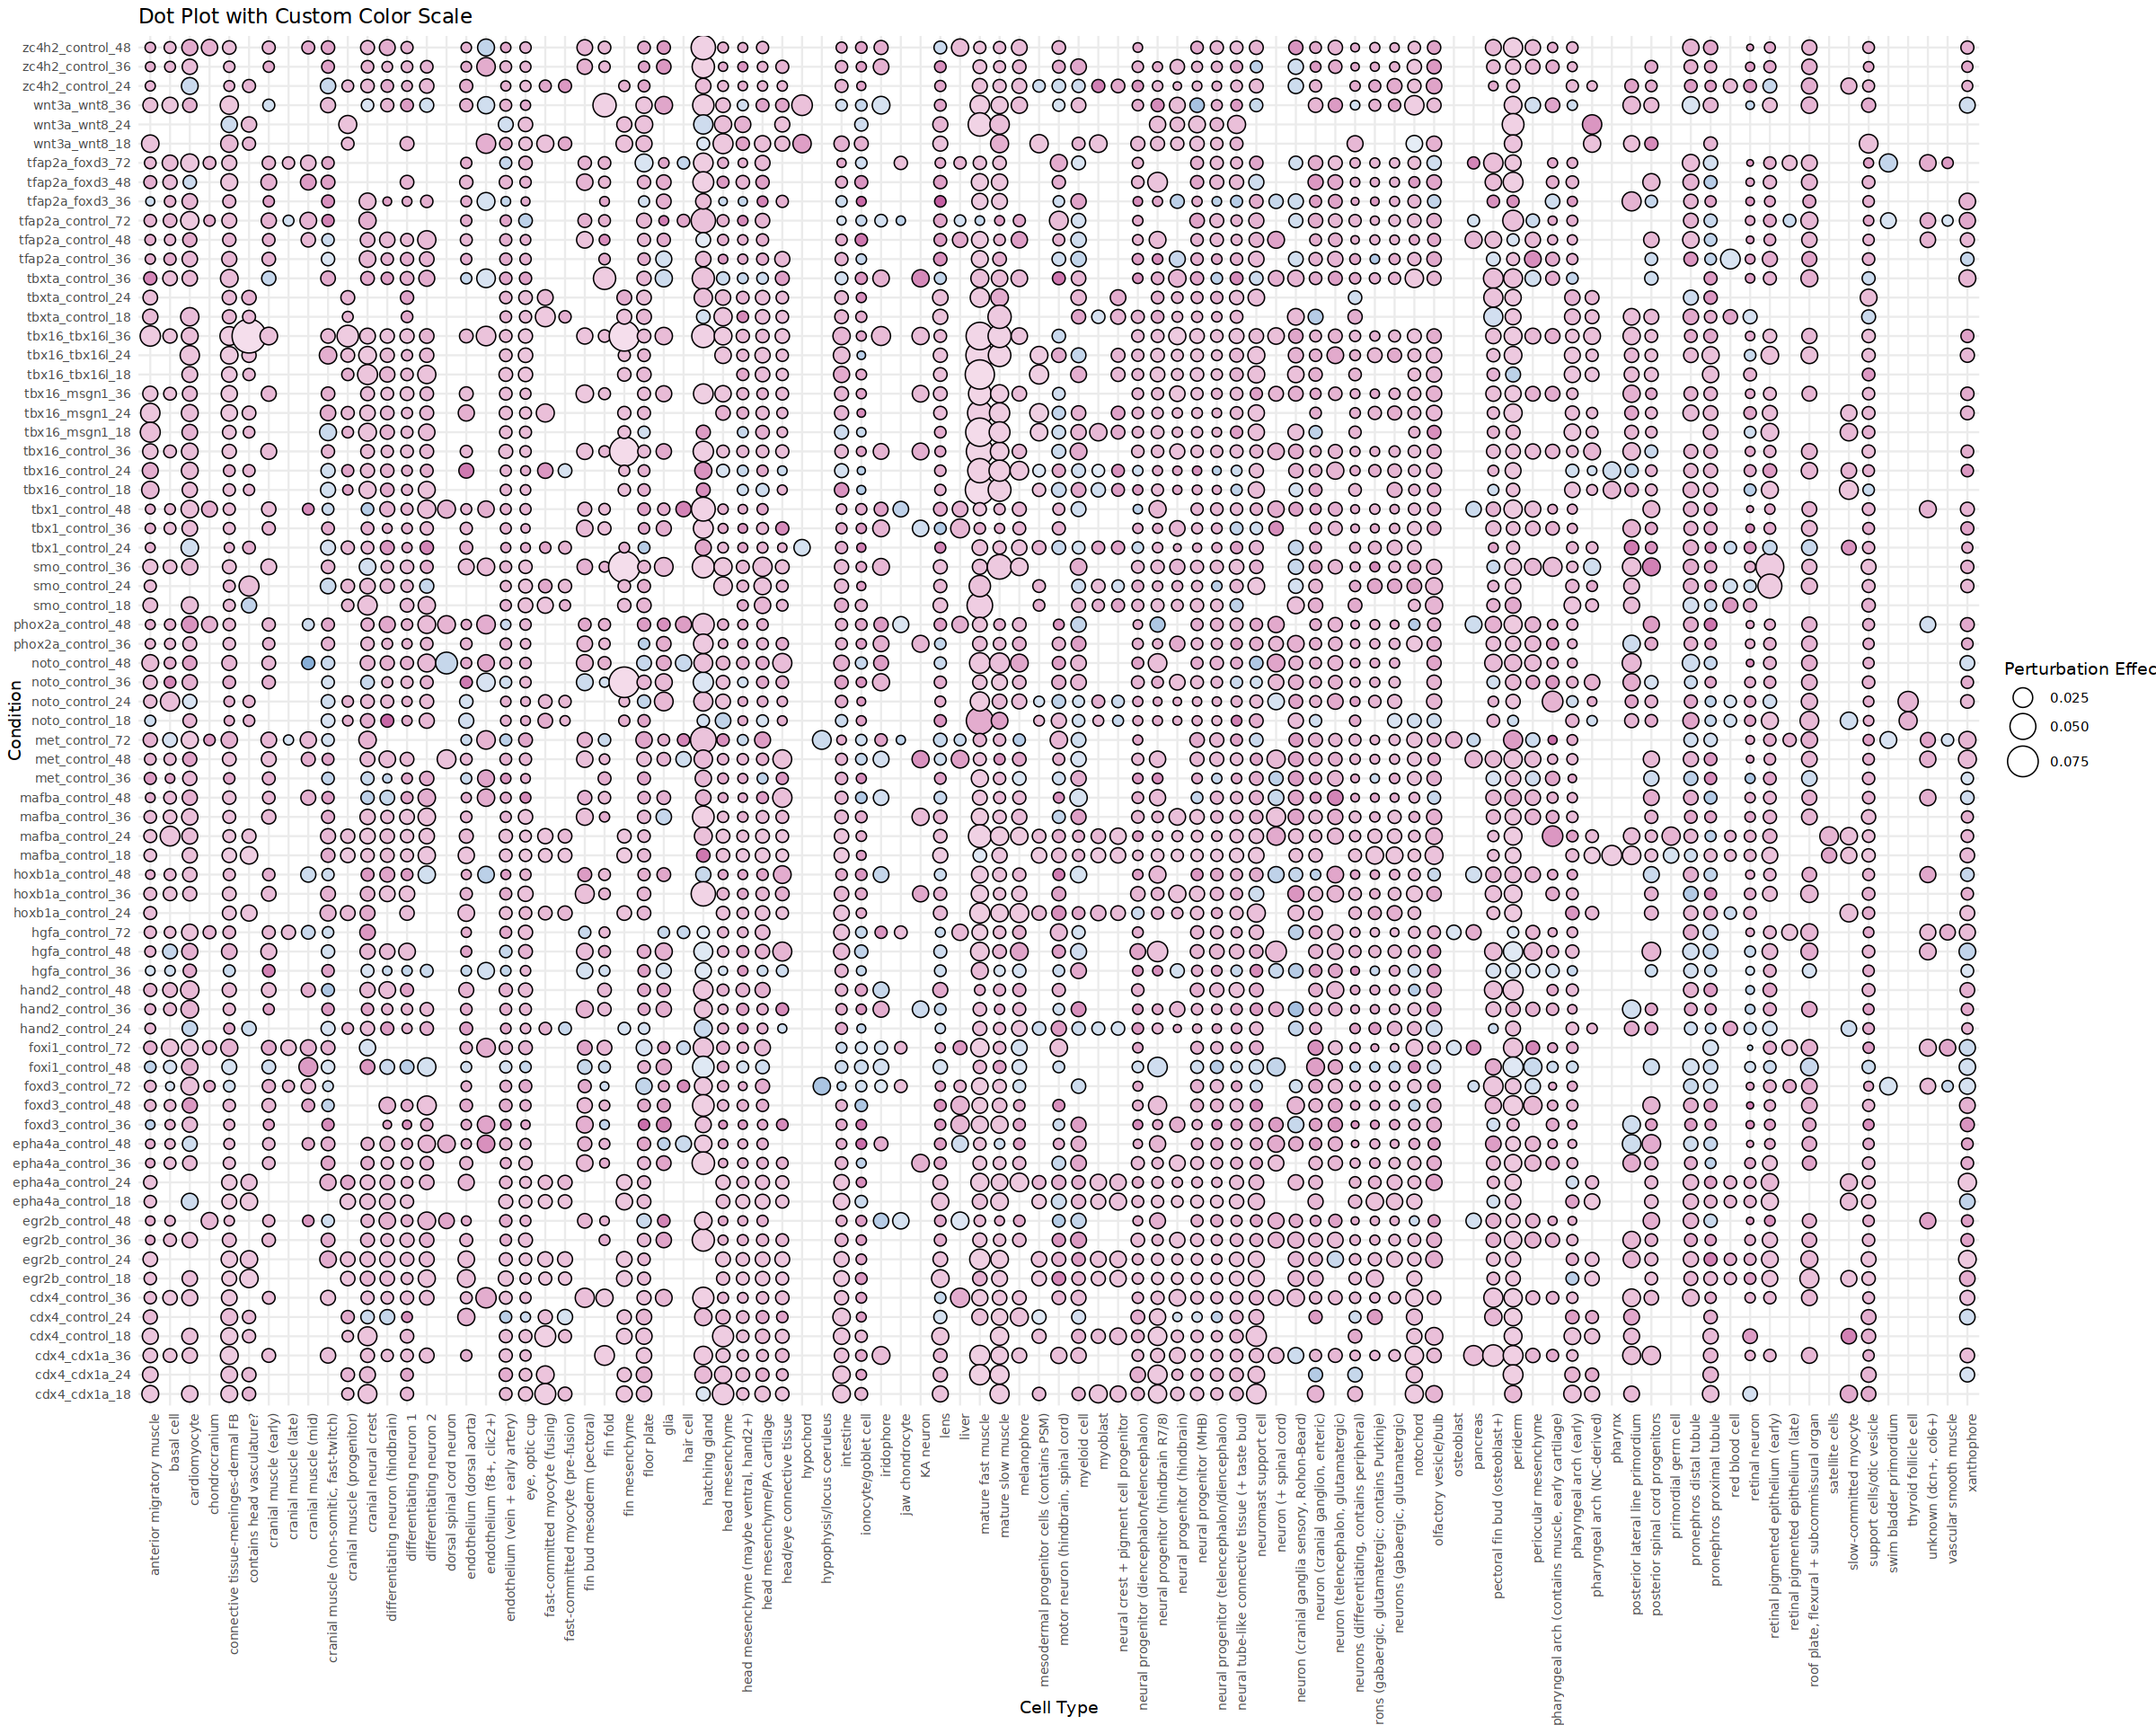

In [10]:
options(repr.plot.width = 20, repr.plot.height = 16)
custom_palette <- c("#B12F8C", "#FFFFFF", "#88afd7")  # Negative -> White -> Positive

df_merged <- df_merged %>%
  mutate(
    log_value = ifelse(is.na(log_value), 0, log_value)
  )

df_merged <- df_merged %>%
  mutate(
    value = ifelse(is.na(value), 0, value)
  )

# Ensure the color scale is centered at 0
max_val <- max(abs(df_merged$log_value))

# Create ggplot
ggplot(df_merged, aes(
  x = cell_type,
  y = condition,
  size = perturbation_effect,
  color = log_value
)) +
  geom_point(
    shape = 21,            # Shape with border
    stroke = 0.5,          # Border thickness
    color = "black",       # Border color
    fill = scales::gradient_n_pal(custom_palette, c(-max_val, 0, max_val))(df_merged$log_value),  # Fill color from gradient
    alpha = 1.0
  ) +
  scale_color_gradient2(
    high="#88afd7",
    mid="white",
    low="#B12F8C",
    limits = c(-max_val, max_val),  # Symmetric limits around 0
    name = "Value",
      
  ) +
  scale_size(range = c(1, 10), name = "Perturbation Effect") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    legend.position = "right"
  ) +
  labs(
    title = "Dot Plot with Custom Color Scale",
    x = "Cell Type",
    y = "Condition"
  )

Warning message:
“Removed 2556 rows containing missing values or values outside the scale range
(`geom_point()`).”


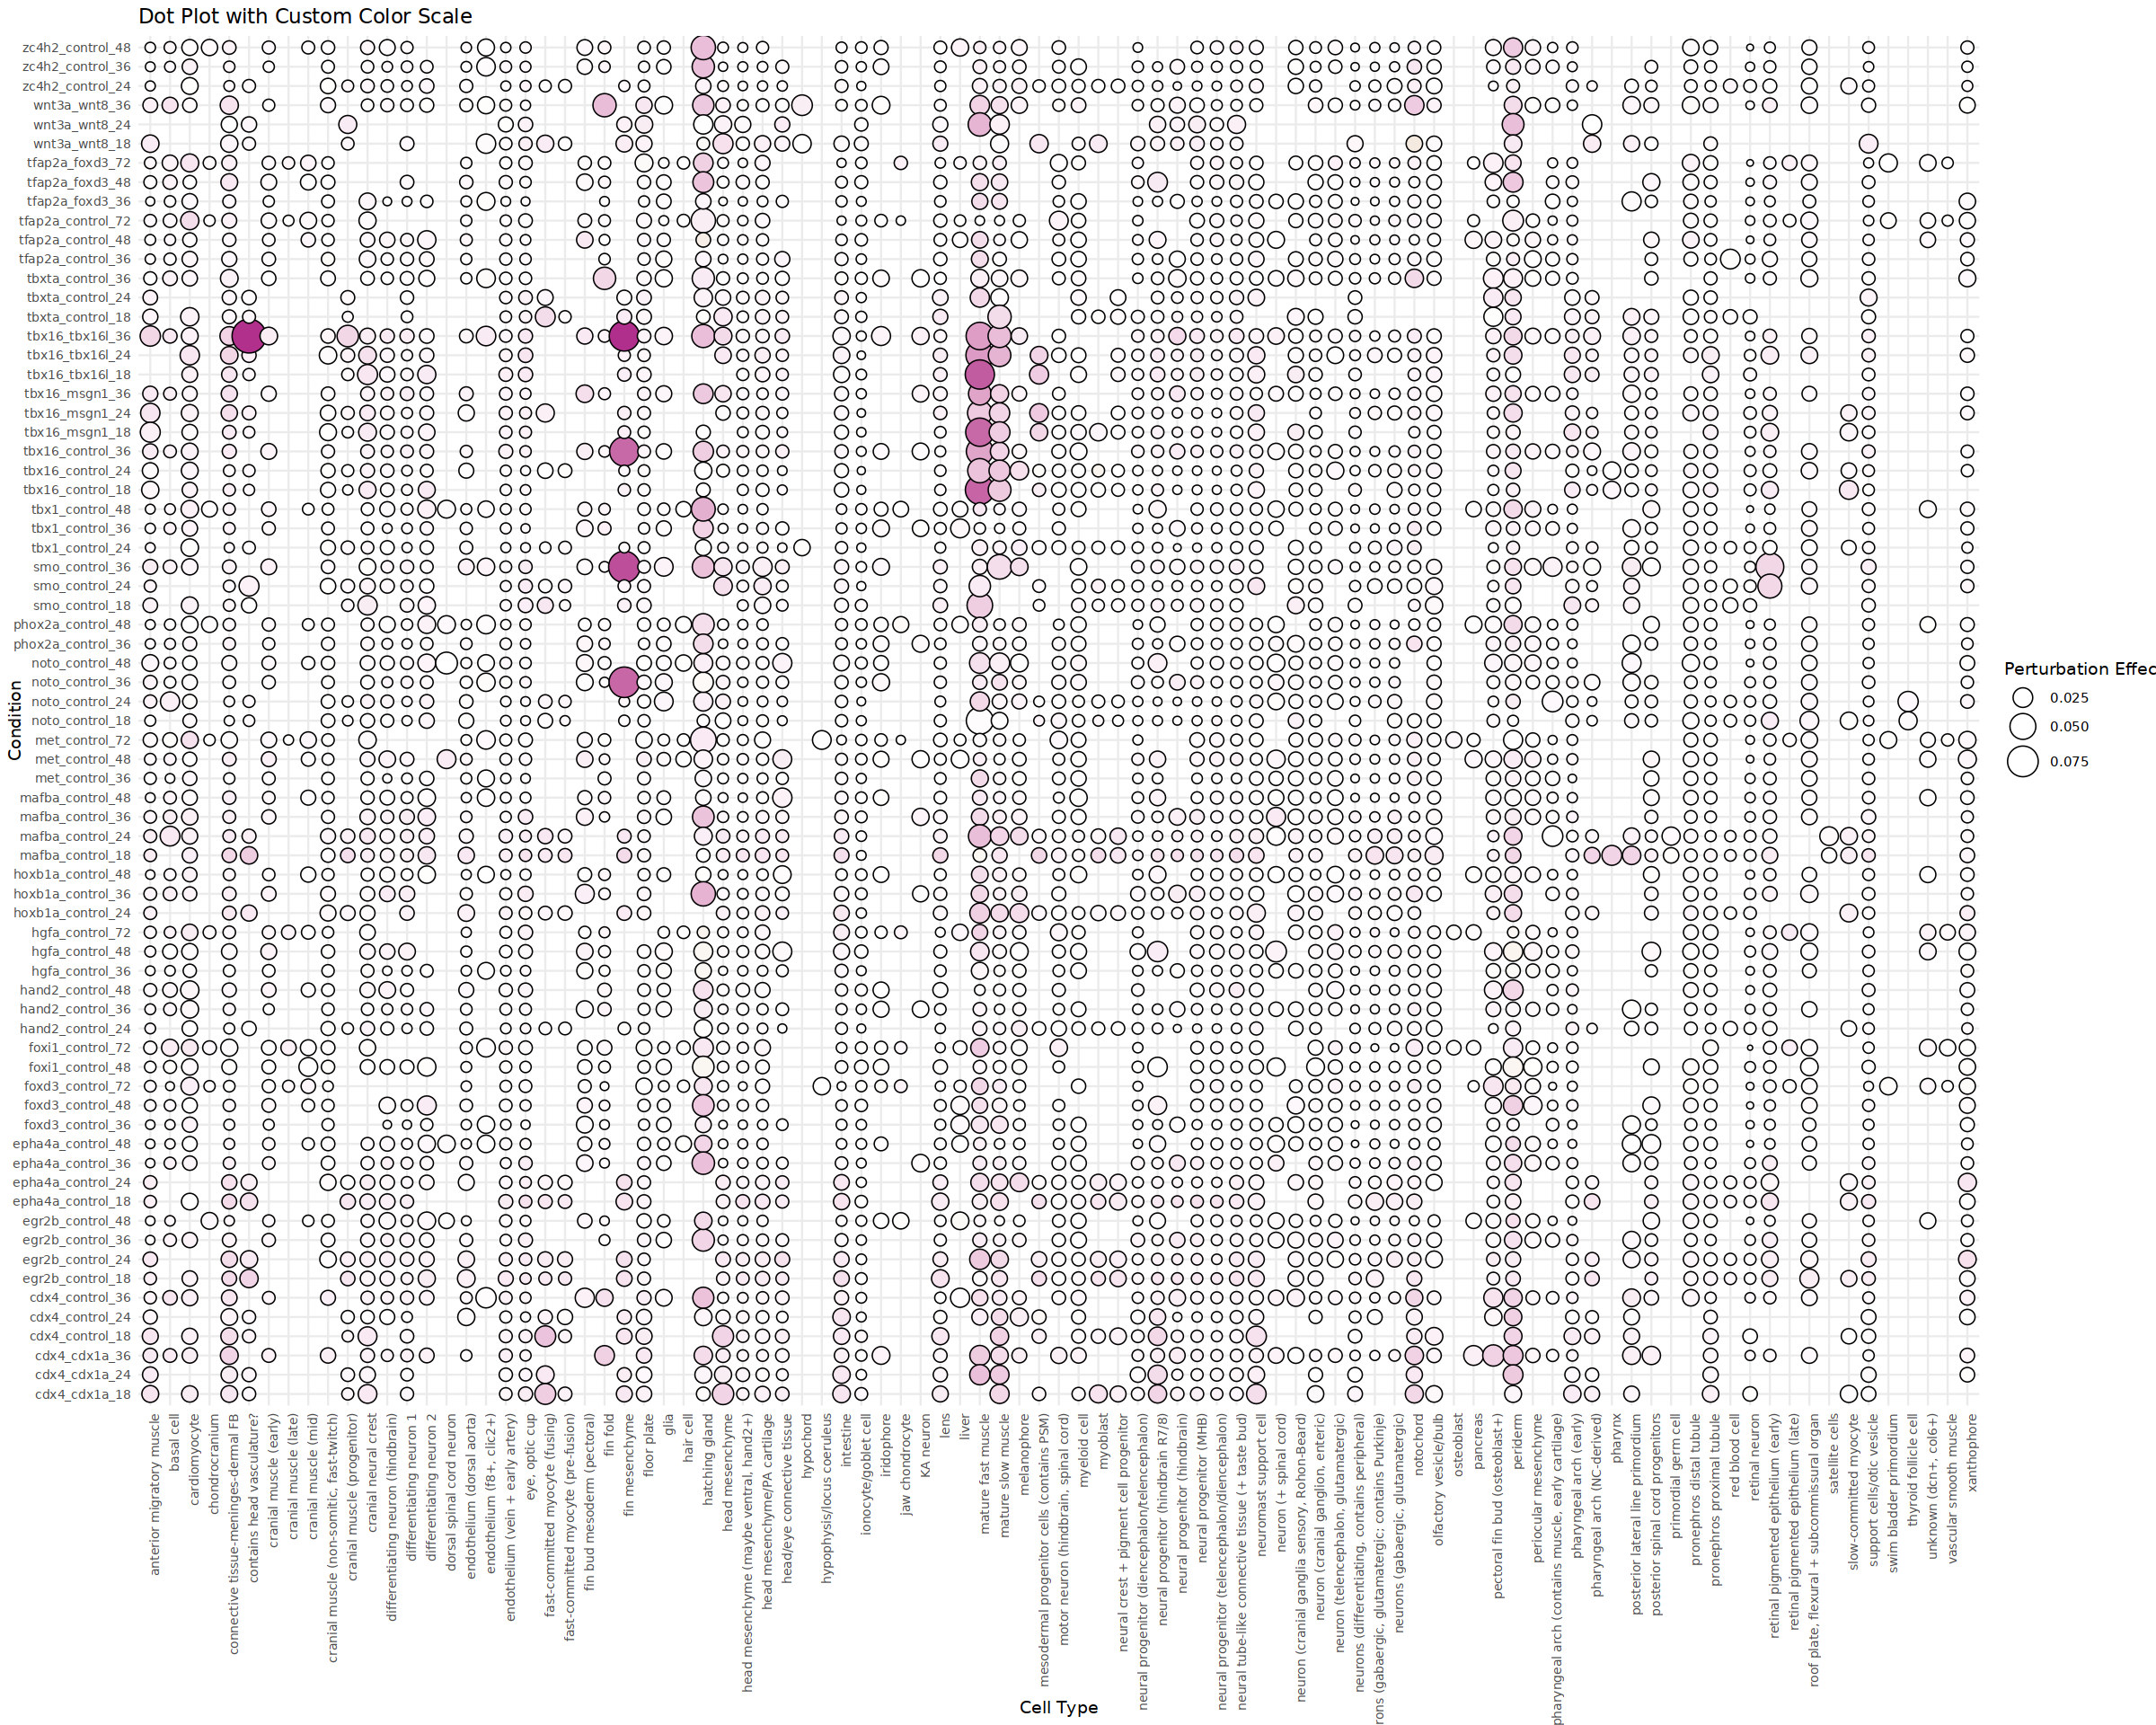

In [5]:
options(repr.plot.width = 20, repr.plot.height = 16)
custom_palette <- c("#B12F8C", "#FFFFFF", "#E1C8AC")  # Negative -> White -> Positive

df_merged <- df_merged %>%
  mutate(
    log_value = ifelse(is.na(log_value), 0, log_value)
  )

df_merged <- df_merged %>%
  mutate(
    value = ifelse(is.na(value), 0, value)
  )

# Ensure the color scale is centered at 0
max_val <- max(abs(df_merged$value))

# Create ggplot
ggplot(df_merged, aes(
  x = cell_type,
  y = condition,
  size = perturbation_effect,
  color = value
)) +
  geom_point(
    shape = 21,            # Shape with border
    stroke = 0.5,          # Border thickness
    color = "black",       # Border color
    fill = scales::gradient_n_pal(custom_palette, c(max_val, 0, -max_val))(df_merged$value),  # Fill color from gradient
    alpha = 1.0
  ) +
  scale_size(range = c(1, 10), name = "Perturbation Effect") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    legend.position = "right"
  ) +
  labs(
    title = "Dot Plot with Custom Color Scale",
    x = "Cell Type",
    y = "Condition"
  )